In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
import subprocess

In [103]:
def run_process(name, no_iters=5, count=1_000_000, domains=16, validate=False):
    cmd = ["../_build/default/benchmarks/bench.exe", name, "-D", str(domains), "--no-iter", str(no_iters), "--count", str(count)]
    if validate:
        cmd += "-T"
    result = subprocess.run(cmd, capture_output=True)
    [time, _, var] = result.stdout.decode("utf-8").split()
    time = time.removesuffix("s").strip()
    var = var.removesuffix("s").strip()
    print(f"time for {name} with {count} inserts was {time} +- {var}")
    return float(time), float(var)

In [104]:
run_process("btree-explicitly", count=100)

time for btree-explicitly with 100 inserts was 0.00003 +- 0.00000


(3e-05, 0.0)

In [116]:
def build_results(data_structures, args, param='domains', values=None):
    results = []
    if not values:
        values = range(1, 16)
    for i in tqdm(values):
        result = {param: i}
        for data_structure in data_structures:
            time, sd = run_process(data_structure, **{param:i}, **args)
            result[data_structure] = time
            result[data_structure + "-var"] = sd
        results.append(result)
    return results

results = build_results(["btree-batched", "btree-coarse", "btree-sequential"], {'count': 1_000_000 })

  0%|          | 0/15 [00:00<?, ?it/s]

time for btree-batched with 1000000 inserts was 3.05413 +- 0.19345
time for btree-coarse with 1000000 inserts was 2.75316 +- 0.03810
time for btree-sequential with 1000000 inserts was 2.26103 +- 0.01314
time for btree-batched with 1000000 inserts was 2.43709 +- 0.07172
time for btree-coarse with 1000000 inserts was 3.30700 +- 0.03822
time for btree-sequential with 1000000 inserts was 2.35889 +- 0.03645
time for btree-batched with 1000000 inserts was 2.00035 +- 0.06058
time for btree-coarse with 1000000 inserts was 4.06262 +- 0.24462
time for btree-sequential with 1000000 inserts was 2.33674 +- 0.05125
time for btree-batched with 1000000 inserts was 1.90394 +- 0.11824
time for btree-coarse with 1000000 inserts was 3.99452 +- 0.17592
time for btree-sequential with 1000000 inserts was 2.32384 +- 0.01729
time for btree-batched with 1000000 inserts was 1.81973 +- 0.10382
time for btree-coarse with 1000000 inserts was 4.14020 +- 0.14754
time for btree-sequential with 1000000 inserts was 2.31

In [114]:
def plot_results(param, data_structures, results, title=None, xlabel=None):
    if not title:
        title = f"Comparison of {param} values on data structure"
    if not xlabel:
        xlabel=param
    param_values = [data[param] for data in results]
    fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
    for data_structure in data_structures:
        values = [data[data_structure] for data in results]
        err = [data[data_structure + "-var"] for data in results]
        plt.errorbar(param_values, values, yerr=err, label=data_structure)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()    

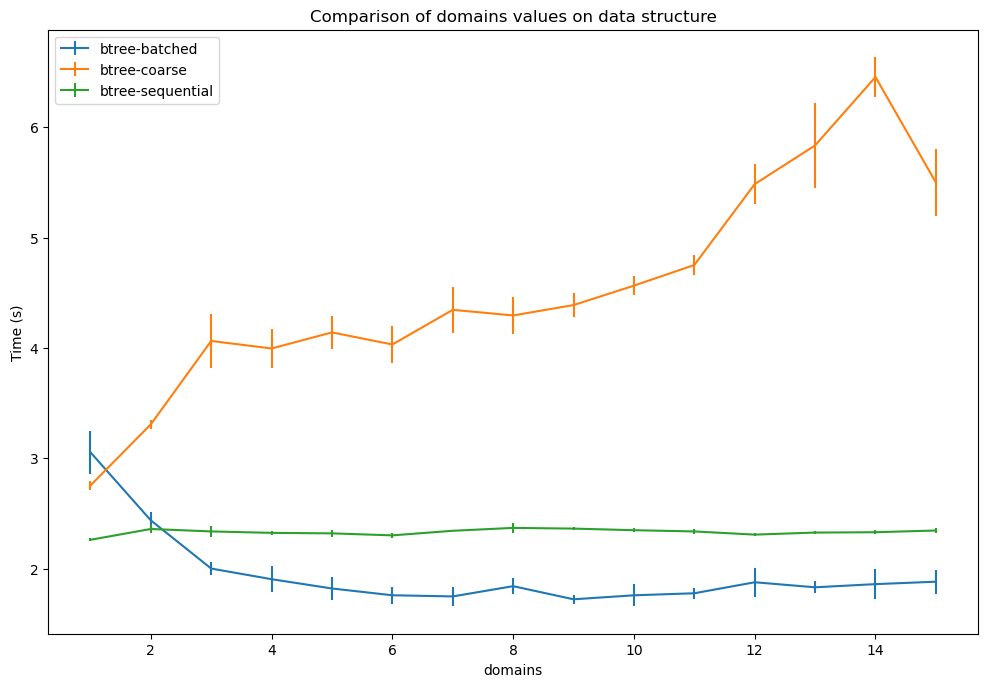

In [117]:
plot_results('domains', ["btree-batched", "btree-coarse", "btree-sequential"], results)

In [82]:
times = [data['domains'] for data in results]
batched = [data['batched'] for data in results]
coarse = [data['coarse'] for data in results]
sequential = [data['sequential'] for data in results]

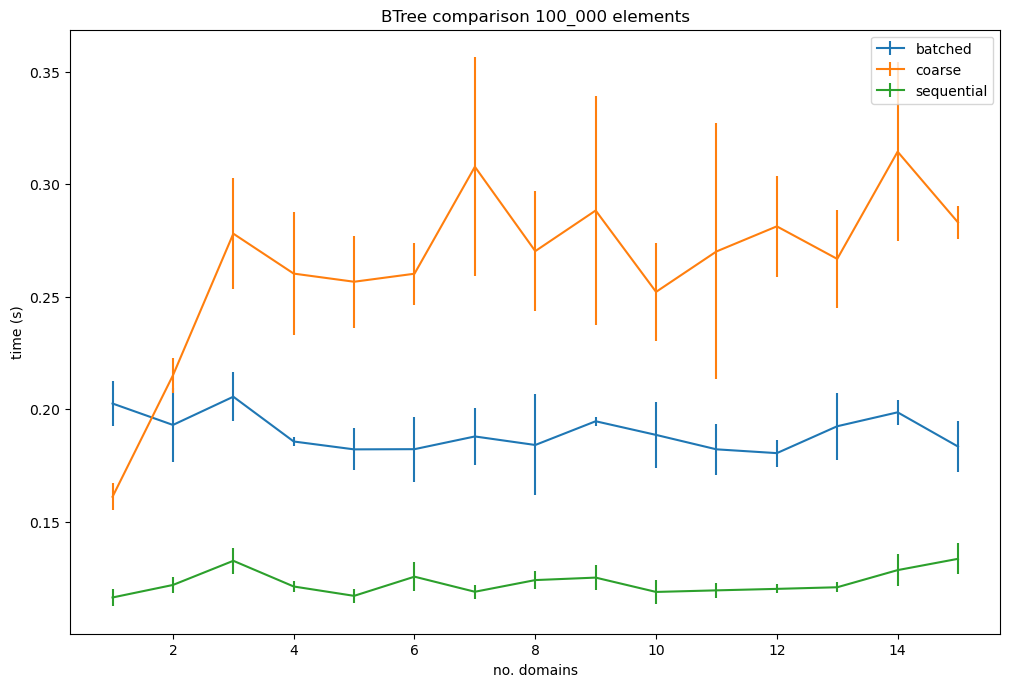

In [90]:
fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
plt.errorbar(times, batched, yerr=[data['batched_var'] for data in results], label="batched")
plt.errorbar(times, coarse, yerr=[data['coarse_var'] for data in results], label="coarse")
plt.errorbar(times, sequential, yerr=[data['sequential_var'] for data in results], label="sequential")
plt.title('BTree comparison 100_000 elements')
plt.xlabel('no. domains')
plt.ylabel('time (s)')
plt.legend()
plt.show()

In [85]:
results

[{'domains': 1,
  'batched': 0.20259,
  'batched_var': 0.01006,
  'coarse': 0.16116,
  'coarse_var': 0.00594,
  'sequential': 0.11638,
  'sequential_var': 0.00391},
 {'domains': 2,
  'batched': 0.19307,
  'batched_var': 0.01639,
  'coarse': 0.21511,
  'coarse_var': 0.0077,
  'sequential': 0.12194,
  'sequential_var': 0.00347},
 {'domains': 3,
  'batched': 0.20562,
  'batched_var': 0.0109,
  'coarse': 0.27809,
  'coarse_var': 0.02461,
  'sequential': 0.13268,
  'sequential_var': 0.00572},
 {'domains': 4,
  'batched': 0.18571,
  'batched_var': 0.00213,
  'coarse': 0.26034,
  'coarse_var': 0.02716,
  'sequential': 0.12126,
  'sequential_var': 0.00251},
 {'domains': 5,
  'batched': 0.18221,
  'batched_var': 0.00936,
  'coarse': 0.25672,
  'coarse_var': 0.02037,
  'sequential': 0.1171,
  'sequential_var': 0.00319},
 {'domains': 6,
  'batched': 0.1823,
  'batched_var': 0.01443,
  'coarse': 0.26029,
  'coarse_var': 0.01385,
  'sequential': 0.12562,
  'sequential_var': 0.00647},
 {'domains': 7